I am going to great a linear algebra model for predicting total infections. The equation will take the form of: y = ax1 + bx2 + c, where y is the log10 of total infections, x1 is the log10 of transportation usage, x2 is the log10 of population density, all by county. I predict the error of this linear model will be fairly high, and most of the effect will come from the intercept. I predict this because the data vizualization seems very noisy when plotted log log.

C:\Users\mdsnb\AppData\Local\Temp\ipykernel_1148\3778198125.py:12: RuntimeWarning: invalid value encountered in log10
  logtrans = np.log10(np.array(data['Public Transportation Usage'].tolist())-1)


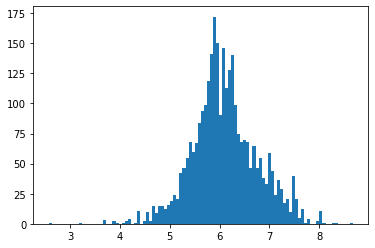

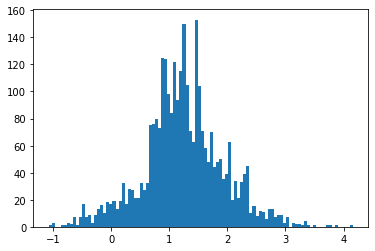

c:\Users\mdsnb\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\mdsnb\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

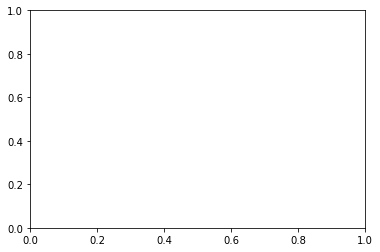

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import math

data = pd.DataFrame(pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\Project 1\countydata.csv"))

logdensity = np.log10(np.array(data['Density'].tolist()))
loginf = np.log10(np.array(data['Total infections'].tolist()))
logtrans = np.log10(np.array(data['Public Transportation Usage'].tolist())+.01)
intercept = np.ones(len(logdensity))

plt.hist(loginf, bins = 100)
plt.show()
plt.hist(logdensity, bins = 100)
plt.show()
plt.hist(logtrans, bins = 100)
plt.show()

matrix = np.vstack((intercept, logtrans, logdensity)).T
print(matrix)

tmp = inv(np.matmul(np.transpose(matrix), matrix))

interceptvalue, slopetrans, slopedensity = tmp @ np.transpose(matrix) @ loginf

print('Intercept is:', interceptvalue, "slope trans is:", slopetrans, 'slope density is:', slopedensity)

model = sm.OLS(loginf, matrix).fit()

print(model.summary())
